# Model Comparison
----

In [152]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [153]:
df_2014 = pd.read_csv('./data/Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv', delimiter= ',')
print(f'Shape: {df_2014.shape}')

Shape: (376, 14)


In [154]:
df_2014.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,851",0,0.0,NaN,0.0,0,0,11,1,10,0,0.0,NaN
1,Addison Town and Village,"2,568",2,0.0,NaN,0.0,1,1,49,1,47,1,0.0,NaN
2,Afton Village4,820,0,0.0,0,NaN,0,0,1,0,1,0,0.0,NaN
3,Akron Village,"2,842",1,0.0,NaN,0.0,0,1,17,0,17,0,0.0,NaN
4,Albany4,"98,595",802,8.0,54,NaN,237,503,"3,888",683,"3,083",122,12.0,NaN


In [155]:
# Clean and convert population coulmn
df_2014['Population'] = df_2014['Population'].str.replace(',','')
df_2014['Population'] = df_2014['Population'].astype(float)

In [156]:
# Clean and Convert Robbery coulmn
df_2014['Robbery'] = df_2014['Robbery'].str.replace(',','')
df_2014['Robbery'] = df_2014['Robbery'].astype(float)

In [157]:
# Clean and Convert Robbery coulmn
df_2014['Burglary'] = df_2014['Burglary'].str.replace(',','')
df_2014['Burglary'] = df_2014['Burglary'].astype(float)

In [158]:
# Clean and Convert Robbery coulmn
df_2014['Violent\r\ncrime'] = df_2014['Violent\r\ncrime'].str.replace(',','')
df_2014['Violent\r\ncrime'] = df_2014['Violent\r\ncrime'].astype(float)

In [159]:
df_2014 = df_2014.loc[lambda df_2014: df_2014['Property\r\ncrime'].notnull(), :]

In [160]:
df_2014['Property\r\ncrime'] = df_2014['Property\r\ncrime'].str.replace(',','')
df_2014['Property\r\ncrime'] = df_2014['Property\r\ncrime'].astype(float)

In [161]:
df_2014['PropertyAndCrimeLog'] = np.log1p(df_2014['Property\r\ncrime'])
df_2014['PopulationLog'] = np.log1p(df_2014['Population'])
df_2014['RobberyLog'] = np.log1p(df_2014['Robbery'])
df_2014['BurglaryLog'] = np.log1p(df_2014['Burglary'])
df_2014['ViolentCrimeLog'] = np.log1p(df_2014['Violent\r\ncrime'])

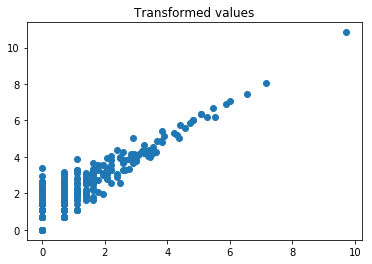

In [162]:
plt.scatter(np.log1p(df_2014['Robbery']), np.log1p(df_2014['Violent\r\ncrime']))
plt.title('Transformed values')
plt.show()

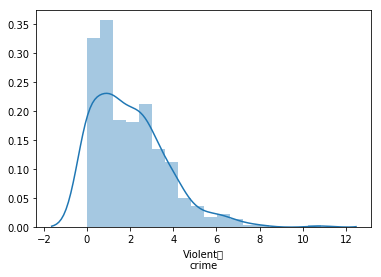

In [163]:
sns.distplot(np.log1p(df_2014['Violent\r\ncrime']))

In [94]:
# Selected Features
# -----------------
# Robbery
# Burglary
# Population

# Linear Regression Model

In [164]:
linear_formula = 'ViolentCrimeLog ~ PopulationLog+RobberyLog+BurglaryLog'

# Fit the model to our data using the formula.
lm_2014 = smf.ols(formula=linear_formula, data=df_2014).fit()

In [165]:
lm_2014.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ViolentCrimeLog   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1096.
Date:                Tue, 07 Aug 2018   Prob (F-statistic):          8.24e-182
Time:                        18:54:48   Log-Likelihood:                -293.55
No. Observations:                 368   AIC:                             595.1
Df Residuals:                     364   BIC:                             610.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1103      0.321     -3.459      0.001      -1.742      -0.479
PopulationLog     0.1580      0.043      3.700      0.000       0.074       0.242
RobberyLog        0.5740      0.038     15.269      0.000       0.500       0.648
BurglaryLog       0.4125      0.036     11.377      0.000       0.341       0.484
==============================================================================
Omnibus:                        4.654   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                5.322
Skew:                           0.128   Prob(JB):                       0.0699
Kurtosis:                       3.530   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

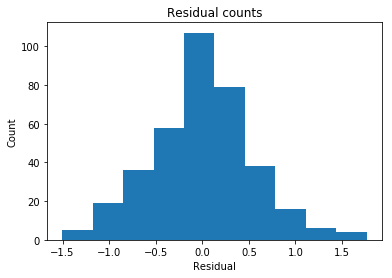

In [166]:
predicted = lm_2014.predict(X).ravel()
actual = df_2014['ViolentCrimeLog']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

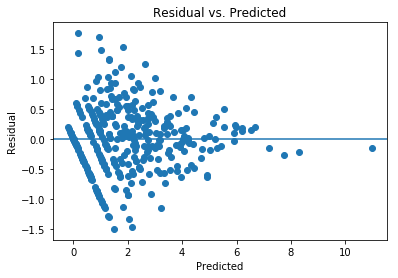

In [167]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [168]:
correlation_matrix = X.corr()
display(correlation_matrix)

,PopulationLog,RobberyLog,BurglaryLog
PopulationLog,1.000000,0.807042,0.834030
RobberyLog,0.807042,1.000000,0.832504
BurglaryLog,0.834030,0.832504,1.000000


# Validation Set

In [169]:
df_2013 = pd.read_csv('./data/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', delimiter= ',')
print(f'Shape: {df_2013.shape}')

Shape: (351, 14)


### Cleaning and manipulating validation set

In [170]:
# Clean and convert population coulmn
df_2013['Population'] = df_2013['Population'].str.replace(',','')
df_2013['Population'] = df_2013['Population'].astype(float)

# Clean and Convert Robbery coulmn
df_2013['Robbery'] = df_2013['Robbery'].str.replace(',','')
df_2013['Robbery'] = df_2013['Robbery'].astype(float)

# Clean and Convert Robbery coulmn
df_2013['Burglary'] = df_2013['Burglary'].str.replace(',','')
df_2013['Burglary'] = df_2013['Burglary'].astype(float)

# Clean and Convert Robbery coulmn
df_2013['Violent\r\ncrime'] = df_2013['Violent\r\ncrime'].str.replace(',','')
df_2013['Violent\r\ncrime'] = df_2013['Violent\r\ncrime'].astype(float)

df_2013 = df_2013.loc[lambda df_2013: df_2013['Property\r\ncrime'].notnull(), :]

df_2013['Property\r\ncrime'] = df_2013['Property\r\ncrime'].str.replace(',','')
df_2013['Property\r\ncrime'] = df_2013['Property\r\ncrime'].astype(float)

df_2013['PropertyAndCrimeLog'] = np.log1p(df_2013['Property\r\ncrime'])
df_2013['PopulationLog'] = np.log1p(df_2013['Population'])
df_2013['RobberyLog'] = np.log1p(df_2013['Robbery'])
df_2013['BurglaryLog'] = np.log1p(df_2013['Burglary'])
df_2013['ViolentCrimeLog'] = np.log1p(df_2013['Violent\r\ncrime'])

In [171]:
Y_2013 = df_2013['ViolentCrimeLog'].values.reshape(-1, 1)
X_2013 = df_2013[['PopulationLog', 'RobberyLog', 'BurglaryLog']]

predicted = lm_2014.predict(X_2013).ravel()

In [172]:
r2_score(df_2013['ViolentCrimeLog'], predicted)

0.8922509601397677

# KNN

In [173]:
# PopulationLog
# RobberyLog
# BurglaryLog
# ViolentCrimeLog

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
# X = pd.DataFrame(music.loudness)
X = df_2014[['PopulationLog', 'RobberyLog', 'BurglaryLog']]
Y = df_2014['ViolentCrimeLog']
knn.fit(X, Y)

# Set up our prediction line.
T = df_2013[['PopulationLog', 'RobberyLog', 'BurglaryLog']]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

In [174]:
score = cross_val_score(knn, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.88 (+/- 0.02)


In [175]:
r2_score(df_2013['ViolentCrimeLog'], Y_)

0.8676278890022295